In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron 


iris = datasets.load_iris()

X= iris.data[:, (2, 3)]
y= (iris.target==0).astype(np.int)
#Standarisation des données
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

per_clf=Perceptron(random_state=0)
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])
print ("le score est de :" +str(per_clf.score(X,y)))


le score est de :1.0


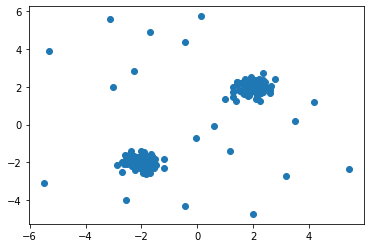

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import OneClassSVM
# On créé deux groupes séparés (échantillons de gaussiennes)
N = 200
data1 = 0.3 * np.random.randn(N // 2, 2) + [2,2]
data2 = 0.3 * np.random.randn(N // 2, 2) - [2,2]
# On créé 10% de données anormales (*outliers*)
outliers = np.random.uniform(size=(N // 10, 2), low=-6, high=6)
# Les données = groupes + anomalies
X = np.concatenate((data1, data2, outliers))
plt.scatter(X[:,0], X[:,1]) and plt.show()

In [47]:
# Construction du modèle (noyau RBF) pour plusieurs valeurs gamma
import numpy as np
import collections as cl
gamma=[0.0001,0.001,0.01,0.10,1.00]
nu=[0.1,0.2,0.3,0.4]
print( "le score pour classification par une OneclassSVM à noyau gaussien:" )
#classification par une SVM à noyau gaussien : 
for i in range (len (gamma)):
    for j in range(len(nu)):
        clf = svm.OneClassSVM(nu=nu[j], kernel="linear", gamma=gamma[i])
        clf.fit(X)
        clf_accuracy = clf.score_samples(X)
        clf_threshold = np.quantile(clf_accuracy,0.03)
        print("le seuille est : "+str(clf_threshold))
        outliers = (clf_accuracy<clf_threshold)
        outliers = cl.Counter(outliers == False)
        inliers = (clf_accuracy>=clf_threshold)
        inliers = cl.Counter(inliers == True)
        print ("le score pour une valeur de gamma ="+str(gamma[i])+ " et une valeur nu ="+str(nu[j])+" est : ")
        print("inliers = {} et outliers = {}".format(inliers[True], outliers[False]))


le score pour classification par une OneclassSVM à noyau gaussien:
le seuille est : -0.00016614558013672298
le score pour une valeur de gamma =0.0001 et une valeur nu =0.1 est : 
inliers = 213 et outliers = 7
le seuille est : -0.00010647123433527028
le score pour une valeur de gamma =0.0001 et une valeur nu =0.2 est : 
inliers = 213 et outliers = 7
le seuille est : -4.937429549399575e-05
le score pour une valeur de gamma =0.0001 et une valeur nu =0.3 est : 
inliers = 213 et outliers = 7
le seuille est : -0.00010787126601061745
le score pour une valeur de gamma =0.0001 et une valeur nu =0.4 est : 
inliers = 213 et outliers = 7
le seuille est : -0.00016614558013672298
le score pour une valeur de gamma =0.001 et une valeur nu =0.1 est : 
inliers = 213 et outliers = 7
le seuille est : -0.00010647123433527028
le score pour une valeur de gamma =0.001 et une valeur nu =0.2 est : 
inliers = 213 et outliers = 7
le seuille est : -4.937429549399575e-05
le score pour une valeur de gamma =0.001 et 

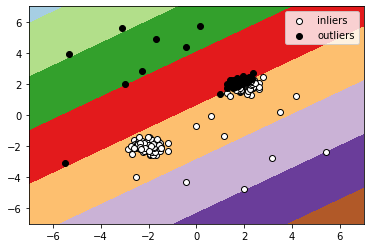

In [48]:
# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)
# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)
# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k',
label='inliers')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [50]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

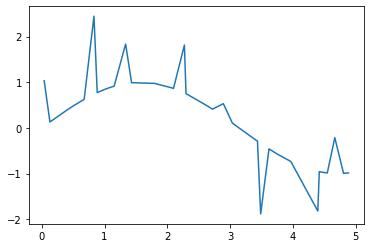

In [52]:
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.plot(X, y)

In [53]:
# Création des SVM
C = 1e3
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)
# Entraînement des SVM sur les observations bruitées
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

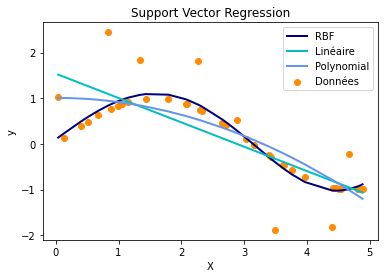

In [54]:
plt.scatter(X, y, color='darkorange', label='Données')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF')
plt.plot(X, y_lin, color='c', lw=2, label='Linéaire')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, test_size=0.30, random_state=0)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 10, 100],
    'gamma':[0.001,0.005,'scale'],
    'kernel':['rbf','linear','poly']
}

search = GridSearchCV(svm.SVR(), param_grid, n_jobs=4, verbose=1, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.score(X_test, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
-3088.7746656296613


[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    2.5s finished
